svc and svr trial and error, no tuning as well

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_squared_error, r2_score
)

In [3]:
data = pd.read_csv('../data/processed/aggregated_dataset.csv')
print("Cleaned dataset shape:", data.shape)
data.head()

Cleaned dataset shape: (40798, 1029)


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,...,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015,CIR_MEAN,CIR_MAX,CIR_MIN
0,0.0,3.90,745.0,18712.0,10250.0,11576.0,64.0,11855.0,967.0,611.0,...,158.0,198.0,87.0,296.0,505.0,307.0,0.0,395.225394,23077.0,0.0
1,0.0,0.66,749.0,11239.0,6313.0,4712.0,64.0,18968.0,1133.0,447.0,...,228.0,187.0,213.0,202.0,89.0,103.0,0.0,444.060039,18059.0,0.0
2,1.0,7.86,746.0,4355.0,5240.0,3478.0,60.0,14699.0,894.0,723.0,...,174.0,124.0,329.0,207.0,96.0,218.0,0.0,503.485236,16809.0,0.0
3,1.0,3.48,750.0,8502.0,8416.0,5890.0,76.0,8748.0,1127.0,1024.0,...,160.0,434.0,397.0,290.0,155.0,342.0,256.0,413.054134,15742.0,13.0
4,0.0,1.19,746.0,17845.0,18095.0,12058.0,68.0,11380.0,1744.0,276.0,...,296.0,87.0,178.0,314.0,247.0,292.0,256.0,363.357283,19583.0,1.0


In [4]:
X = data.drop(columns=['NLOS', 'RANGE'])

y_class = data['NLOS']
y_reg = data['RANGE']   

In [5]:
# split data into training and testing sets
# split for classification (stratified split)
X_train, X_test, y_class_train, y_class_test = train_test_split(
    X, y_class,
    test_size=0.3,
    stratify=y_class,
    random_state=42
)

# split for regression (same indices using random_state=42)
_, _, y_reg_train, y_reg_test = train_test_split(
    X, y_reg,
    test_size=0.3,
    random_state=42
)

# verify shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (28558, 1027)
Testing set shape: (12240, 1027)


Classification Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.95      0.87      6216
         1.0       0.93      0.77      0.84      6024

    accuracy                           0.86     12240
   macro avg       0.87      0.86      0.86     12240
weighted avg       0.87      0.86      0.86     12240



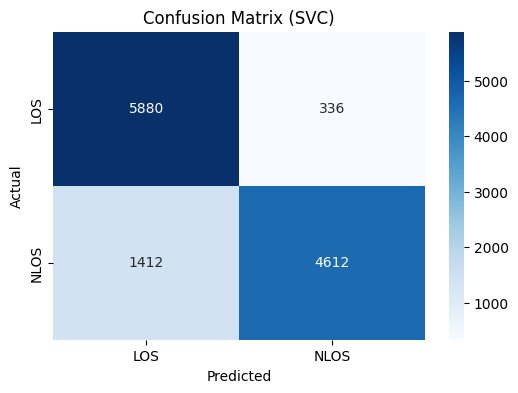

In [6]:
# train svc model for classification
#  Initialize SVC model
svc = SVC(kernel='rbf', random_state=42)

# Train the model
svc.fit(X_train, y_class_train)

# Predict on test set
y_class_pred = svc.predict(X_test)

# Evaluate classification performance
accuracy = accuracy_score(y_class_test, y_class_pred)
report = classification_report(y_class_test, y_class_pred)
cm = confusion_matrix(y_class_test, y_class_pred)

print(f"Classification Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['LOS', 'NLOS'], yticklabels=['LOS', 'NLOS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVC)')
plt.show()

RMSE: 2.39
R² Score: -0.03


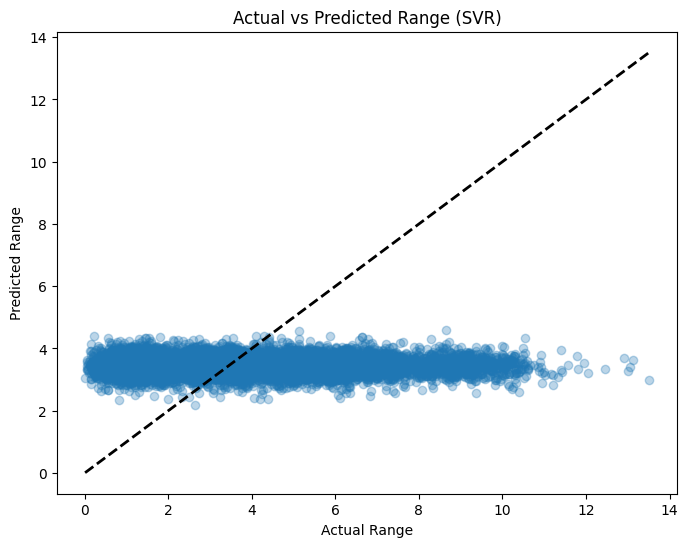

In [7]:
# train svr for regression
# Initialize SVR model
svr = SVR(kernel='rbf')

# Train the model
svr.fit(X_train, y_reg_train)

# Predict on test set
y_reg_pred = svr.predict(X_test)

# Evaluate regression performance
rmse = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred))
r2 = r2_score(y_reg_test, y_reg_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.3)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'k--', lw=2)
plt.xlabel('Actual Range')
plt.ylabel('Predicted Range')
plt.title('Actual vs Predicted Range (SVR)')
plt.show()

In [ ]:
# feature scaling
# SVR and SVC benefit from feature scaling
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Retrain SVC with scaled features
svc_scaled = SVC(kernel='rbf', random_state=42)
svc_scaled.fit(X_train_scaled, y_class_train)
y_class_pred_scaled = svc_scaled.predict(X_test_scaled)

# Evaluate scaled SVC
accuracy_scaled = accuracy_score(y_class_test, y_class_pred_scaled)
print(f"Classification Accuracy (Scaled): {accuracy_scaled:.2f}")

# Retrain SVR with scaled features
svr_scaled = SVR(kernel='rbf')
svr_scaled.fit(X_train_scaled, y_reg_train)
y_reg_pred_scaled = svr_scaled.predict(X_test_scaled)

# Evaluate scaled SVR
rmse_scaled = np.sqrt(mean_squared_error(y_reg_test, y_reg_pred_scaled))
r2_scaled = r2_score(y_reg_test, y_reg_pred_scaled)
print(f"RMSE (Scaled): {rmse_scaled:.2f}")
print(f"R² Score (Scaled): {r2_scaled:.2f}")

Classification Accuracy (Scaled): 0.87
RMSE (Scaled): 2.41
R² Score (Scaled): -0.05
